# Atmosphere

In [1]:
import matplotlib.pyplot as plt
from typhon import plots

import konrad


plots.styles.use('typhon')

In the introduction we have already learned how to initialize an atmopshere component.

In [2]:
plev, phlev = konrad.utils.get_pressure_grids(1000e2, 1, 128)
atmosphere = konrad.atmosphere.Atmosphere(phlev)

The atmosphere component is used to prescribe the gaseous composition of our model. For example,
we can remove all ozone from our model column

In [3]:
atmosphere["O3"][:] = 0.0

Next, we can compile and run our RCE simulation

In [4]:
rce = konrad.RCE(
    atmosphere,
    surface=konrad.surface.FixedTemperature(288.),  # Run with a fixed surface temperature.
    timestep='12h',  # Set timestep in model time.
    max_duration='100d',  # Set maximum runtime.
)
rce.run()  # Start the simulation.

Finally, we can plot the equilibrated temperature profile

Text(0, 0.5, '$p$ / hPa')

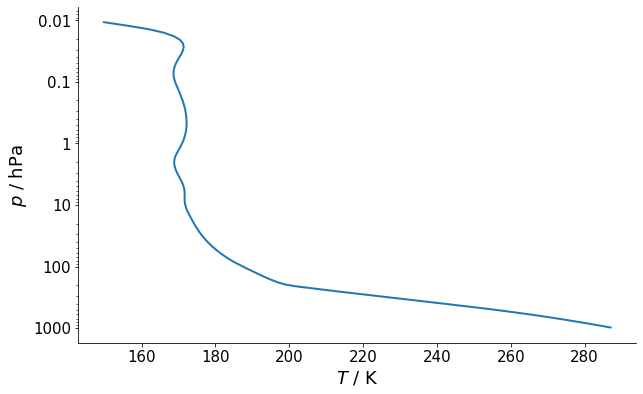

In [5]:
fig, ax = plt.subplots()
plots.profile_p_log(atmosphere['plev'], atmosphere['T'][-1, :])
ax.set_xlabel(r"$T$ / K")
ax.set_ylabel("$p$ / hPa")